In [2]:
!pip install -U textblob


Requirement already up-to-date: textblob in /Users/priyasarkar/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: nltk>=3.1 in /Users/priyasarkar/anaconda3/lib/python3.6/site-packages (from textblob)
Requirement already up-to-date: six in /Users/priyasarkar/anaconda3/lib/python3.6/site-packages (from nltk>=3.1->textblob)
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /Users/priyasarkar/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/priyasarkar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/priyasarkar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/priyasarkar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/priyasarkar/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/priyasarkar/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [26]:
import os
from textblob import TextBlob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [6]:

columns = ['Rank','Song','Artist','Year','Lyrics','ids','Energy','Liveness','Tempo','Speechiness','Acousticness','Instrumentalness','Time Signature','Danceability','Key','Duration (ms)','Loudness','Valence']
df = pd.read_csv('data/billboard_lyrics_2000-2015.csv', header=None, names=columns)



rowVals = []
totalRows = len(df['Rank'])


for i in range(0, 124):
    testimonial = TextBlob("".join(df.loc[i, ['Lyrics']]))
    rowVals.append(testimonial.sentiment.polarity)

rowVals.append(0)

for j in range(125,totalRows):
    testimonial = TextBlob("".join(df.loc[i, ['Lyrics']]))
    rowVals.append(testimonial.sentiment.polarity)
    
#print(len(rowVals))





1602


In [7]:
df['Sentiment'] = rowVals


,path,file,lyrics
count,1,1,1
unique,1,1,1
top,./lyrics2015/billboard_lyrics_2000-2015-Copy1.csv,billboard_lyrics_2000-2015-Copy1.csv,billboard_lyrics_2000-2015-Copy1.csv
freq,1,1,1


In [11]:

d = df[["Rank","Sentiment"]][:-1]
d.describe()
x = pd.DataFrame(data=d, columns=["Sentiment"]) 
y = pd.DataFrame(data=d, columns=["Rank"]) 
#d["Rank"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = GaussianNB()
clf.fit(x_train, y_train)

/Users/priyasarkar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [23]:
clf.score(x_train, y_train)



0.01328125

In [28]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/Users/priyasarkar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/priyasarkar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/priyasarkar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/priyasarkar/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was e

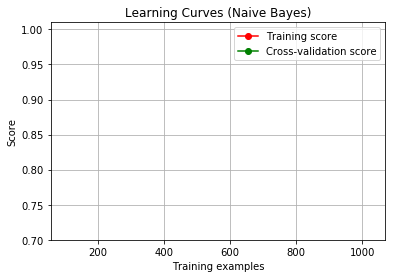

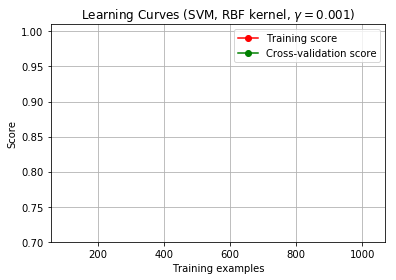

In [29]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, x_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, x_train, y_train, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()